In [1]:
using Flux
using Distributions
using Gadfly

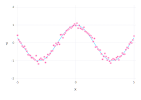

In [26]:
f(x) = cos(x) + rand(Normal(0, 0.1))

xtrain = collect(-5:0.1:5)
ytrain = f.(xtrain)

dots = layer(x=xtrain, y=ytrain, color=[colorant"hotpink"], Geom.point)
lines = layer(x=xtrain, y=cos.(xtrain), Geom.line)
plot(dots, lines)

In [21]:
model = Chain(Dense(1, 2, tanh), Dense(2, 1))
loss(x, y) = Flux.Losses.mse(model(x), y)
optimiser = Descent(0.1)

┌ Info: Epoch 1
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138


Descent(0.1)

In [22]:
x = rand(Normal(), 100)
y = f.(x)
train_data = Iterators.repeated((Array(x'), Array(y')), 100)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{Matrix{Float64}, Matrix{Float64}}}}(Base.Iterators.Repeated{Tuple{Matrix{Float64}, Matrix{Float64}}}(([0.6778039238672497 0.8668679534877808 … -1.5786629621423294 1.18941015379388], [0.5862912302400243 0.5908241409017438 … 0.0719396353181842 0.4174643060903487])), 100)

In [23]:
Flux.@epochs 10 Flux.train!(loss, Flux.params(model), train_data, optimiser)

┌ Info: Epoch 1
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 2
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 3
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 4
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 5
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 6
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 7
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 8
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 9
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138
┌ Info: Epoch 10
└ @ Main C:\Users\julio\.julia\packages\Flux\BPPNj\src\optimise\train.jl:138


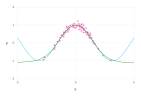

In [27]:
ŷ = zeros(length(xtrain))
for (i, x) in enumerate(xtrain)
    ŷ[i] = model([xtrain[i]])[1]
end

predicted = layer(x=xtrain, y=ŷ, color=[colorant"green"], Geom.line)
truevalue = layer(x=xtrain, y=cos.(xtrain), Geom.line)
data = layer(x=x, y=y, color=[colorant"hotpink"], Geom.point)
plot(predicted, truevalue, data)